In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
import seaborn as sns

In [9]:
file_location = "./aircrashes.csv"

df = pd.read_csv(file_location)

In [10]:
df

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...
5030,1980,Qtr 3,September,17,Zaire,De Havilland,de Havilland DHC 5 Buffalo9T,Near Kindu Zaire,Force Air Zairean - Military,0,36,36
5031,1997,Qtr 3,September,12,Zaire,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 3009Q,Near Uvira Zaire,Commuter Air TMK,0,22,22
5032,1984,Qtr 3,September,11,Zaire,Handley Page Dart Herald,Handley Page Dart Herald 2029Q CAH,Near the Kwango River Zaire,Services Aero MMM,0,30,30
5033,1980,Qtr 3,September,14,Zaire,Lockheed Hercules,Lockheed Hercules C 1309T,Kindu Zaire,Zaïroise Aérienne Force - Military,0,36,36


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4758 entries, 3 to 5034
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   4758 non-null   int64 
 1   Quarter                4758 non-null   object
 2   Month                  4758 non-null   object
 3   Day                    4758 non-null   int64 
 4   Country/Region         4758 non-null   object
 5   Aircraft Manufacturer  4758 non-null   object
 6   Aircraft               4758 non-null   object
 7   Location               4758 non-null   object
 8   Operator               4758 non-null   object
 9   Ground                 4758 non-null   int64 
 10  Fatalities (air)       4758 non-null   int64 
 11  Aboard                 4758 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 483.2+ KB


In [16]:
print(df.isna().sum())

Year                     0
Quarter                  0
Month                    0
Day                      0
Country/Region           0
Aircraft Manufacturer    0
Aircraft                 0
Location                 0
Operator                 0
Ground                   0
Fatalities (air)         0
Aboard                   0
dtype: int64


In [13]:
df = df.dropna(axis = 0)

In [80]:
df.rename(columns={'Country/Region':'Region'},
           inplace =True)

In [17]:
df.loc[:, 'Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1), errors='coerce')


In [18]:
df

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard,Date
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24,2000-04-19
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12,1946-04-30
5,1960,Qtr 2,April,14,'-,Douglas,Douglas DC 4?,Taipei -,Force Air Thai Royal,0,18,18,1960-04-14
6,2024,Qtr 2,April,23,Alaska,Douglas,Douglas C-54D Skymaster N3054V,Near Fairbanks,Alaska Air Fuel,0,2,2,2024-04-23
7,1958,Qtr 2,April,21,10,Douglas,Douglas DC 7 / F,Near Sloan 10,Nevada Vegas Las of SW miles United Air L...,0,49,49,1958-04-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,1980,Qtr 3,September,17,Zaire,De Havilland,de Havilland DHC 5 Buffalo9T,Near Kindu Zaire,Force Air Zairean - Military,0,36,36,1980-09-17
5031,1997,Qtr 3,September,12,Zaire,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 3009Q,Near Uvira Zaire,Commuter Air TMK,0,22,22,1997-09-12
5032,1984,Qtr 3,September,11,Zaire,Handley Page Dart Herald,Handley Page Dart Herald 2029Q CAH,Near the Kwango River Zaire,Services Aero MMM,0,30,30,1984-09-11
5033,1980,Qtr 3,September,14,Zaire,Lockheed Hercules,Lockheed Hercules C 1309T,Kindu Zaire,Zaïroise Aérienne Force - Military,0,36,36,1980-09-14


In [125]:
df['Survivor Rate (%)'] = df['Fatalities (air)'] / df['Aboard'] 

In [112]:
df

,Year,Quarter,Month,Day,Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard,Date,Fatality Rate (%)
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24,2000-04-19,1.0
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12,1946-04-30,1.0
5,1960,Qtr 2,April,14,'-,Douglas,Douglas DC 4?,Taipei -,Force Air Thai Royal,0,18,18,1960-04-14,1.0
6,2024,Qtr 2,April,23,Alaska,Douglas,Douglas C-54D Skymaster N3054V,Near Fairbanks,Alaska Air Fuel,0,2,2,2024-04-23,1.0
7,1958,Qtr 2,April,21,10,Douglas,Douglas DC 7 / F,Near Sloan 10,Nevada Vegas Las of SW miles United Air L...,0,49,49,1958-04-21,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,1980,Qtr 3,September,17,Zaire,De Havilland,de Havilland DHC 5 Buffalo9T,Near Kindu Zaire,Force Air Zairean - Military,0,36,36,1980-09-17,1.0
5031,1997,Qtr 3,September,12,Zaire,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 3009Q,Near Uvira Zaire,Commuter Air TMK,0,22,22,1997-09-12,1.0
5032,1984,Qtr 3,September,11,Zaire,Handley Page Dart Herald,Handley Page Dart Herald 2029Q CAH,Near the Kwango River Zaire,Services Aero MMM,0,30,30,1984-09-11,1.0
5033,1980,Qtr 3,September,14,Zaire,Lockheed Hercules,Lockheed Hercules C 1309T,Kindu Zaire,Zaïroise Aérienne Force - Military,0,36,36,1980-09-14,1.0


In [23]:
crashes_per_year.sum()

Year                 222378
Number of Crashes      4758
dtype: int64

In [39]:
air_fatalities = df['Fatalities (air)'].sum()
air_fatalities

np.int64(106269)

In [38]:
ground_fatalities = df['Ground'].sum()
ground_fatalities

np.int64(8574)

In [40]:
total_fatalities = air_fatalities + ground_fatalities
total_fatalities

np.int64(114843)

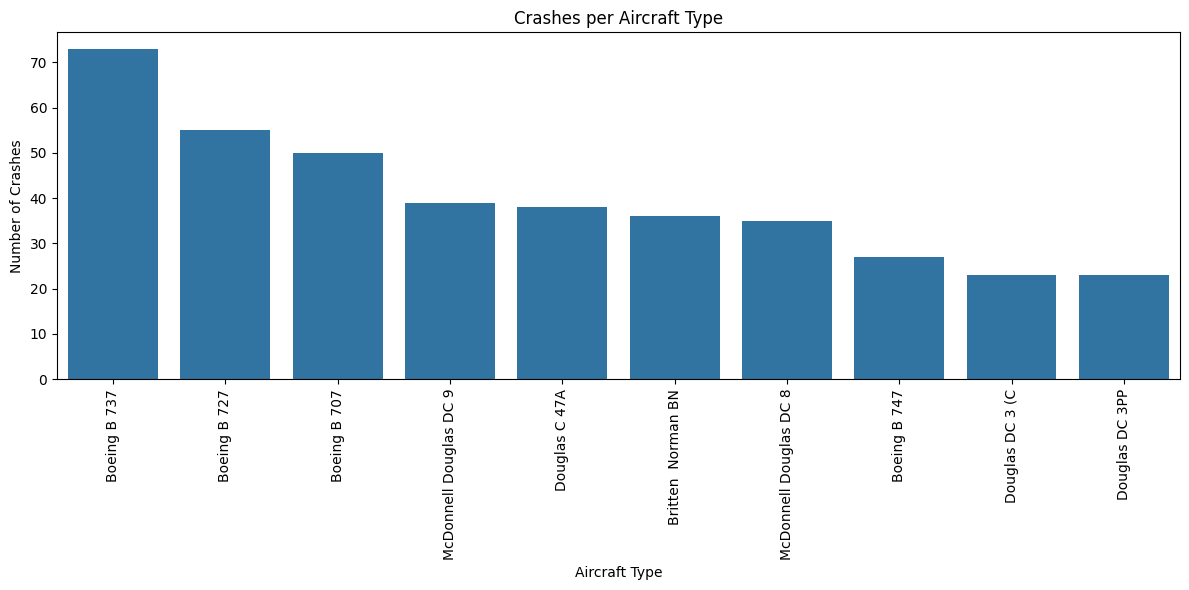

In [76]:
crashes_per_aircraft = df.groupby('Aircraft').size().reset_index(name='Number of Crashes')
crashes_per_aircraft

crashes_per_aircraft_sorted = crashes_per_aircraft.sort_values(by='Number of Crashes', ascending=False)
crashes_per_aircraft_sorted 
top_10_crashes = crashes_per_aircraft_sorted.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Aircraft', y='Number of Crashes', data=top_10_crashes)
plt.title('Crashes per Aircraft Type')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

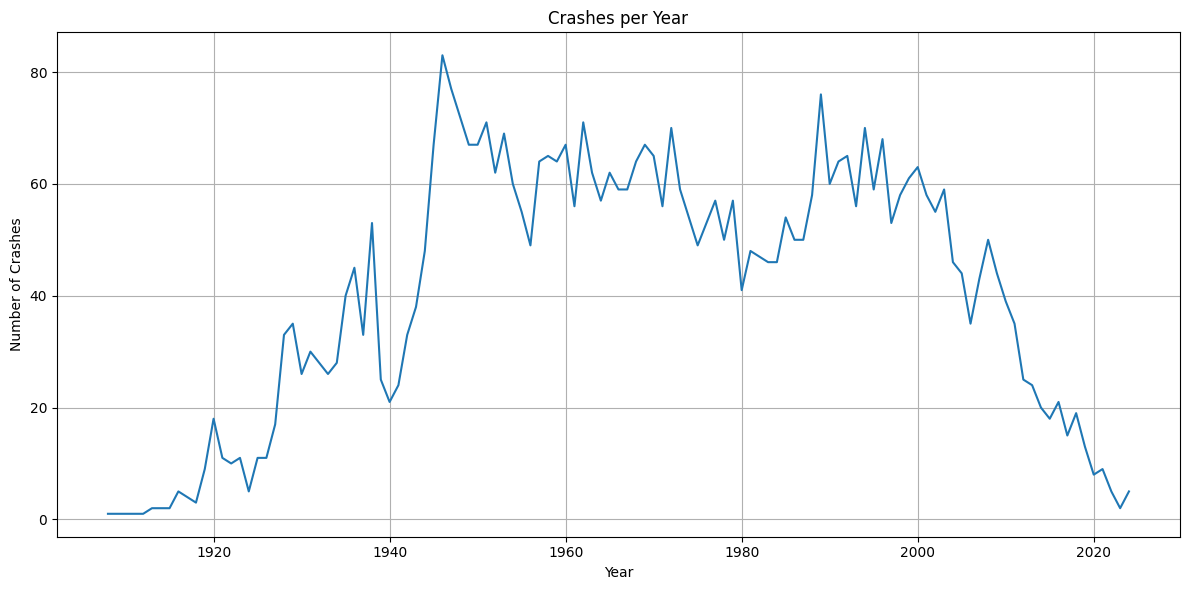

In [81]:
# Group by 'Year' and count the number of crashes per year
crashes_per_year = df.groupby('Year').size().reset_index(name='Crashes by Year')


# Plot as a continuous line graph
plt.figure(figsize=(12, 6))
plt.plot(crashes_per_year['Year'], crashes_per_year['Crashes by Year'])

# Title and labels
plt.title('Crashes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')


# Display the graph
plt.tight_layout()
plt.grid(True)
plt.show()

In [88]:
# Crashes by Country

crashes_per_region = df.groupby('Region').size().reset_index(name='Crashes by Region')
crashes_per_region_sorted = crashes_per_region.sort_values(by='Crashes by Region', ascending=False)
crashes_per_region_sorted

,Region,Crashes by Region
391,Russia,249
76,Brazil,162
115,Colombia,146
329,New,142
93,California,112
...,...,...
489,WYUS,1
490,Wantagh,1
491,Warks,1
492,Washingon,1


In [85]:
df

,Year,Quarter,Month,Day,Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard,Date,Fatality Rate (%)
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24,2000-04-19,100.0
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12,1946-04-30,100.0
5,1960,Qtr 2,April,14,'-,Douglas,Douglas DC 4?,Taipei -,Force Air Thai Royal,0,18,18,1960-04-14,100.0
6,2024,Qtr 2,April,23,Alaska,Douglas,Douglas C-54D Skymaster N3054V,Near Fairbanks,Alaska Air Fuel,0,2,2,2024-04-23,100.0
7,1958,Qtr 2,April,21,10,Douglas,Douglas DC 7 / F,Near Sloan 10,Nevada Vegas Las of SW miles United Air L...,0,49,49,1958-04-21,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,1980,Qtr 3,September,17,Zaire,De Havilland,de Havilland DHC 5 Buffalo9T,Near Kindu Zaire,Force Air Zairean - Military,0,36,36,1980-09-17,100.0
5031,1997,Qtr 3,September,12,Zaire,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 3009Q,Near Uvira Zaire,Commuter Air TMK,0,22,22,1997-09-12,100.0
5032,1984,Qtr 3,September,11,Zaire,Handley Page Dart Herald,Handley Page Dart Herald 2029Q CAH,Near the Kwango River Zaire,Services Aero MMM,0,30,30,1984-09-11,100.0
5033,1980,Qtr 3,September,14,Zaire,Lockheed Hercules,Lockheed Hercules C 1309T,Kindu Zaire,Zaïroise Aérienne Force - Military,0,36,36,1980-09-14,100.0


In [90]:
df.columns

Index(['Year', 'Quarter', 'Month', 'Day', 'Region', 'Aircraft Manufacturer',
       'Aircraft', 'Location', 'Operator', 'Ground', 'Fatalities (air)',
       'Aboard', 'Date', 'Fatality Rate (%)'],
      dtype='object')

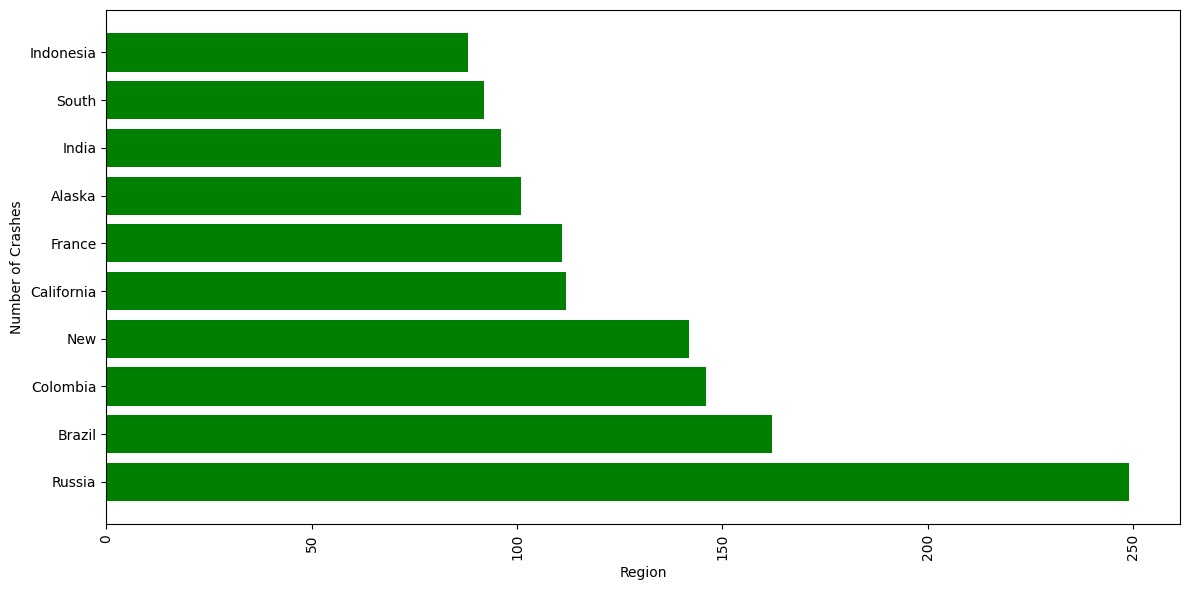

In [99]:

crashes_per_region = df.groupby('Region').size().reset_index(name='Crashes by Region')
crashes_per_region_sorted = crashes_per_region.sort_values(by='Crashes by Region', ascending=False)
top_10_region = crashes_per_region_sorted.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_10_region['Region'], top_10_region['Crashes by Region'], color='green')
plt.xlabel('Region')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

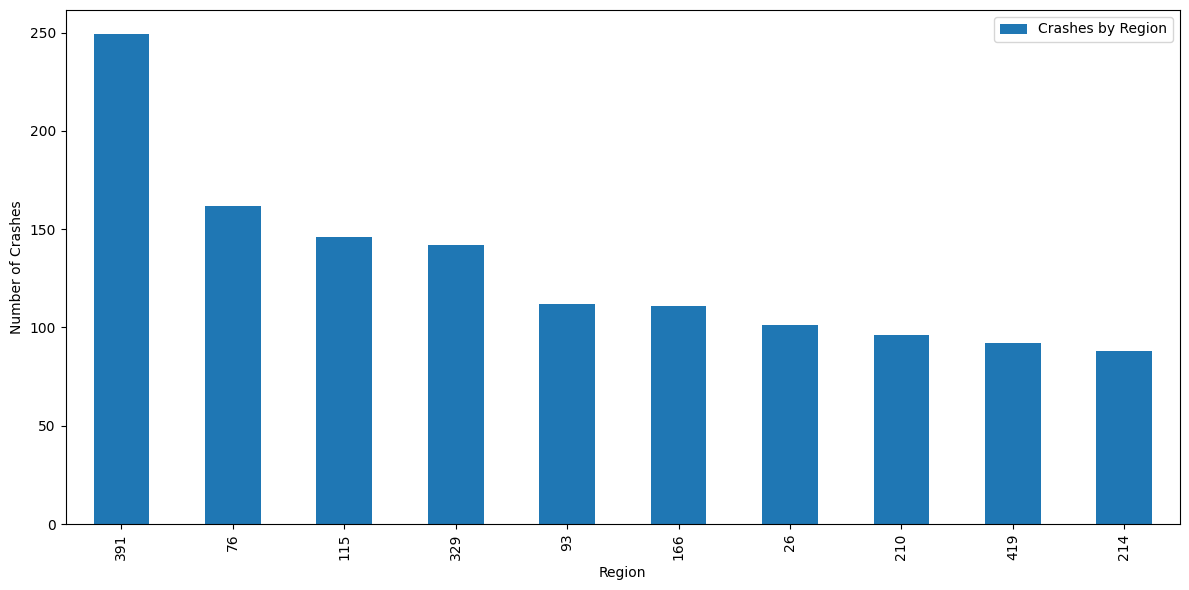

In [95]:

crashes_per_region = df.groupby('Region').size().reset_index(name='Crashes by Region')
crashes_per_region_sorted = crashes_per_region.sort_values(by='Crashes by Region', ascending=False)
top_10_region = crashes_per_region_sorted.head(10)

plt.figure(figsize=(12, 6))
top_10_region.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.xlabel('Region')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [108]:

#4 Fatalitites by Month

monthly_fatalities = df.groupby('Month')['Fatalities (air)'].sum().reset_index(name='Fatalities by air')

monthly_fatalities


,Month,Fatalities by air
0,April,6854
1,August,10093
2,December,10146
3,February,7791
4,January,8763
5,July,10195
6,June,7671
7,March,8955
8,May,7700
9,November,10031


<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

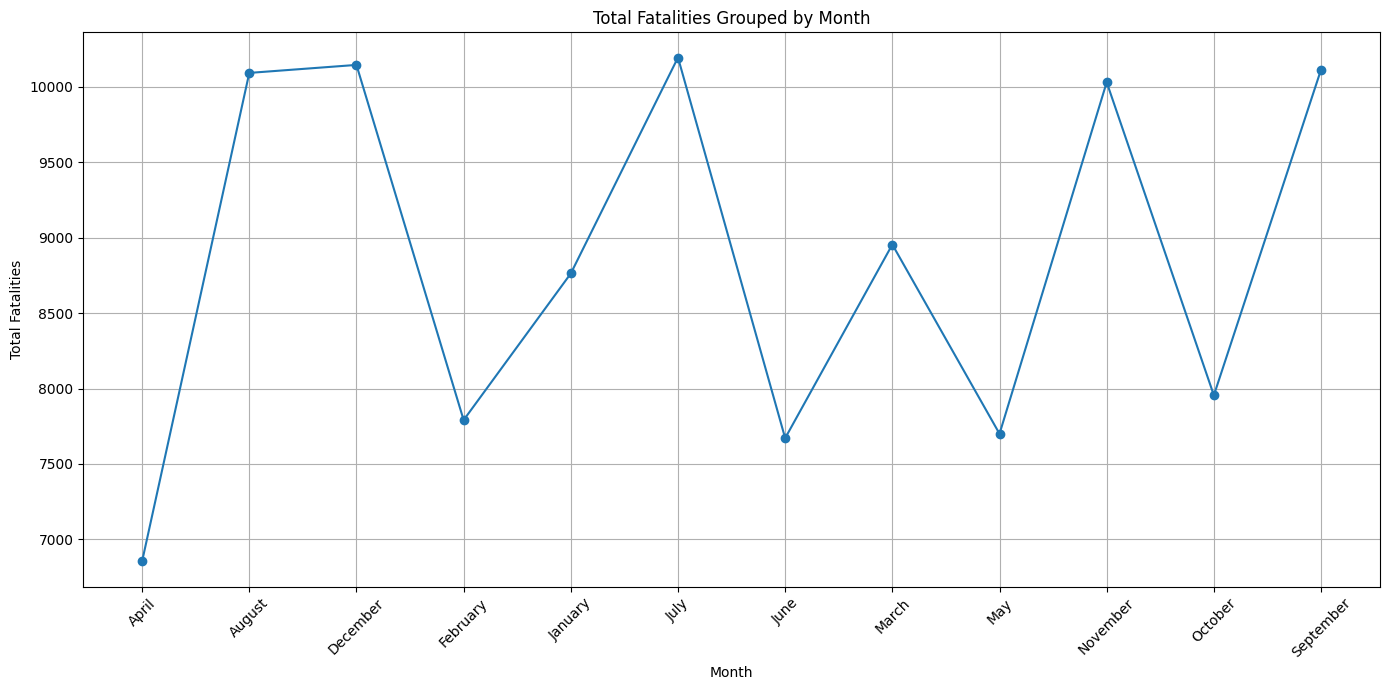

In [109]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(monthly_fatalities['Month'], monthly_fatalities['Fatalities by air'], marker='o', linestyle='-')
plt.title('Total Fatalities Grouped by Month')
plt.xlabel('Month')
plt.ylabel('Total Fatalities')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


In [113]:
df

,Year,Quarter,Month,Day,Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard,Date,Fatality Rate (%)
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24,2000-04-19,1.0
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12,1946-04-30,1.0
5,1960,Qtr 2,April,14,'-,Douglas,Douglas DC 4?,Taipei -,Force Air Thai Royal,0,18,18,1960-04-14,1.0
6,2024,Qtr 2,April,23,Alaska,Douglas,Douglas C-54D Skymaster N3054V,Near Fairbanks,Alaska Air Fuel,0,2,2,2024-04-23,1.0
7,1958,Qtr 2,April,21,10,Douglas,Douglas DC 7 / F,Near Sloan 10,Nevada Vegas Las of SW miles United Air L...,0,49,49,1958-04-21,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,1980,Qtr 3,September,17,Zaire,De Havilland,de Havilland DHC 5 Buffalo9T,Near Kindu Zaire,Force Air Zairean - Military,0,36,36,1980-09-17,1.0
5031,1997,Qtr 3,September,12,Zaire,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 3009Q,Near Uvira Zaire,Commuter Air TMK,0,22,22,1997-09-12,1.0
5032,1984,Qtr 3,September,11,Zaire,Handley Page Dart Herald,Handley Page Dart Herald 2029Q CAH,Near the Kwango River Zaire,Services Aero MMM,0,30,30,1984-09-11,1.0
5033,1980,Qtr 3,September,14,Zaire,Lockheed Hercules,Lockheed Hercules C 1309T,Kindu Zaire,Zaïroise Aérienne Force - Military,0,36,36,1980-09-14,1.0


In [123]:
yearly_survivor_rate = df.groupby('Year')['Survivor Rate (%)'].mean().reset_index(name = 'Survivor Rate')
yearly_survivor_rate

,Year,Survivor Rate
0,1908,0.500000
1,1912,1.000000
2,1913,1.000000
3,1915,0.707317
4,1916,0.992857
...,...,...
108,2020,0.742497
109,2021,0.829034
110,2022,0.688372
111,2023,1.000000


<Figure size 1400x700 with 0 Axes>

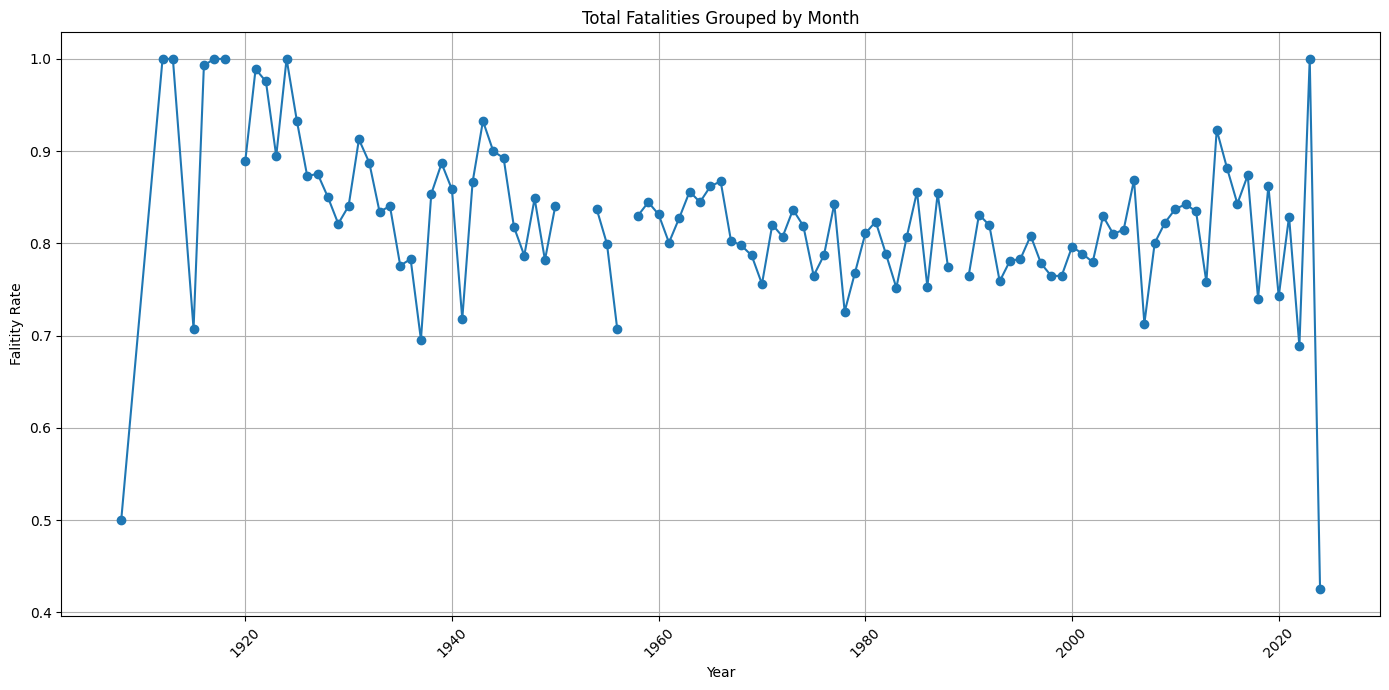

In [124]:
plt.figure(figsize=(14, 7))
plt.plot(yearly_survivor_rate['Year'], yearly_survivor_rate['Survivor Rate'], marker='o', linestyle='-')
plt.title('Total Fatalities Grouped by Month')
plt.xlabel('Year')
plt.ylabel('Falitity Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

# Research Questions


1.	How many airplane crashes have occurred each year since 1908?
There were 4,553 airplane crashes since the year 1908

2.	What is the total number of casualties over the years?
There has been a total of 109,634 deaths as a result of air crashes

3.	Which countries had the highest number of airplane crashes?
Russia had the highest number of airplane crashes.

4.	Are there certain months with higher crash rates?
Yes. The month of September had abnormally high crash rates along the years

5.	What is the average number of fatalities per crash?
The average number of fatalities is 24 deaths.


# Findings and Recommendations

1. The rate of airplane crashes spiked significantly during the second half of the year.

Recommendations
+ Consider increasing maintenance checks during this period, as higher traffic volumes might lead to more wear and tear on aircraft.
+ Investigate the weather patterns during the second half of the year, as adverse weather conditions (e.g., storms, heavy rains, snow, etc.) that can contribute to a higher rate of crashes.


2. Survivor rates for airplane crashes varied between 80% and 90%, indicating a relatively high likelihood of survival across incidents.

Recommendations
+ Use data analytics to identify patterns or common factors in crashes with lower survival rates and address these specific issues. 
+ Invest in ongoing research and development efforts to further advance aviation safety technologies and practices.


3. Russia has the highest number of airplane crashes globally.

Recommendations
+ Regulatory bodies should intensify inspections of airlines and airports in Russia to identify and address potential safety issues.

4. The Boeing B series encountered three times as many crashes than the average airplane model.

Recommendations
+ Conduct thorough safety audits of the Boeing B series to assess design, manufacturing, and operational issues.
+ Provide additional training for pilots and crew members specifically for operating the Boeing B series, focusing on any identified issues or unique operational challenges.

5. "The number of airplane crashes peaked in 1943 with 88 crash incidents and has steadily declined ever since, with only two crashes reported in 2020, marking a significant reduction in incidents.

Recommendations 
+ Good Job.
+ Reflect on the past years and do more of what is working.

In [128]:
number_of_crashes = df['Aircraft'].count()

number_of_crashes

np.int64(4758)

<Figure size 1400x700 with 0 Axes>

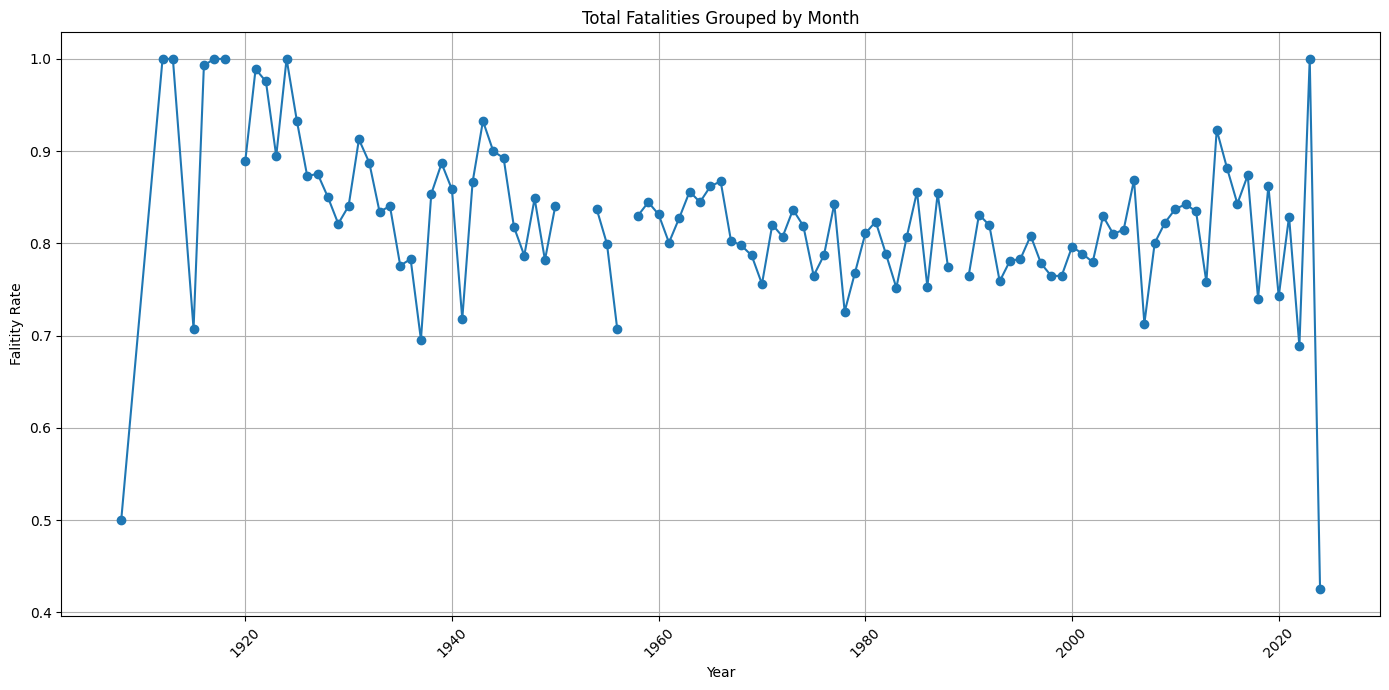